# <center>Neural Netwoks</center>

## Fundamentos
Podemos entender una red neuronal mediante diferentes perspectivas:
* Una aplicadicón de Stochastic Gradient Descent con una gama de hipótesis muchísimo más amplia.
* Una red que aprenden con base a distribuciones diversas.
* Un metodo black-box para hacer predicción de datos.

Comenzamos el estudio con redes de tipo $\textit{feed forward}$ con $\textit{Back Propagation}$

El elemento básico de una red neuronal es... una neurona, también conocida como nodo. Una representación gráfica es: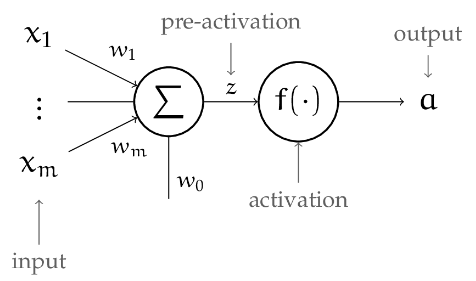.

El input es un vector $x \in \mathbb{R}^m$ y el output de una neurona es $a \in \mathbb{R}$. Algunos de los parámetros de cada nodo son $(w_1, \ldots , w_ m) \in \mathbb {R}^ m$ y un offset $w_0 \in \mathbb{R}$. En escencia estamos representando una función no lineal cualquiera $f: \mathbb{R}\mapsto\mathbb{R}$ de la forma: 
$$a = f(z) = f\left(\sum _{j=1}^ m x_ jw_ j + w_0\right) = f(w^ Tx + w_0)\; \; $$

$\textbf{¿Cómo se entrena una Neurona?}$: La idea es prácticamente la misma que anteriormente, queremos minimizar la función de pérdida $\mathcal{L}$ sobre el Data Set ajustando los $w$'s, con esto la función objetivo es 
$$J(w, w_0) = \sum _{i} \mathcal{L}\left(NN(x^{(i)}; w, w_0), y^{(i)}\right)\; \; $$
Donde $NN$ es el output de cierta neurona para determinado $x^{(i)}$.

### Layer

Ahora estamos interesados en buscar la unión de $n$ neuronas interconectadas, de esta forma, todas se alimentan de un vector input $x \in \mathbb {R}^ m$ y cada neurona tiene sus propios $w$'s para sacar un output $a$ por neuona, tal que si juntamos todas las neuronas de la capa el output es un vector $A$ con $n$ componentes (igual al número de neuronas de la capa).
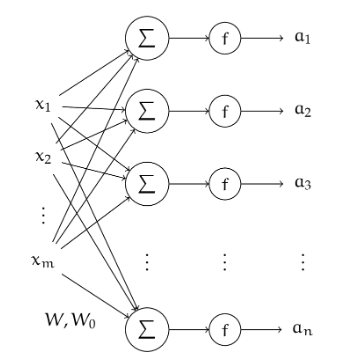.

Como necesitamos definir tantos pesos, y tantos offset, conviene organizarlos matricialmente, de esta forma una capa queda totalmente definida por: 
* $W$ una matriz de tamaño $m \times n$ con los pesos de cada neurona en cada fila 
* $W_0$ un vector $n\times 1$ con el offset de cada neurona
* $X$ el input 
* $Z=W^TX+W_0$ se conoce como pre-activation 
* $A=f(Z)$ un vector de tamaño $n\times 1$ que es el output.

El caracter de no lienalidad de las redes neuronales está ligado a la unión de muchas capas.




### Network

La idea es utilizar recursivamente las capas, vamos a denotar con $l$ el nombre de cada capa, de esta manera, una Network con $L$ capas se puede representar: 
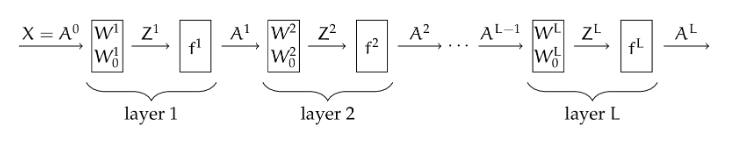

Podemos ver que el output de la capa $l-1$: $A^{l-1}$ es el input de la capa $l$: $X^{l}$. Así, la última capa puede tener output $A^L$ del tamaño que se le indique, es decir, un vector o un escalar.


### Activation Functions

Es muy importante para la no linealidad de la red neuronal cómo se haga la definición de la $f$ de cada layer, para esto, la función identidad por ejemplo no es para nada útil.
Por eso, veamos algunas funciones de activación útiles:
* $\textbf{Step Function}:$ Básicamente el on y off que se utiliza en el perceptron (acá no es muy útil).
* $\textbf{Rectified linear unit}$: (ReLU$(z)$)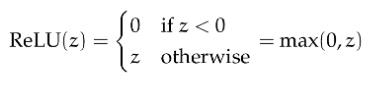 
* $\textbf{Sigmoid Function}$: (Función Logística) Cuando empezaron a crear NN, querían steṕ function sencillos, pero en este caso no se podrían utilizar gradient descent. Por eso se usa la sigmoide como si fuera una step pero smooth.$$\sigma(z)=\frac{1}{1+e^{-z}}$$
* $\textbf{Hyperbolic tangent}$: Esta es otra forma de tener una función step pero que se comporta diferente y está en el rango $[-1,1]$.$$\text{tanh}(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$.
* $\textbf{Softmax Function}$: Toma un vector entero $Z \in \mathbb{R}^n$ y genera $A \in [0,1]^n$ tal que la suma de todas las componentes de $A$ suman $1$, así que se puede interpretar como probabilidades de que ocurra cada componente.

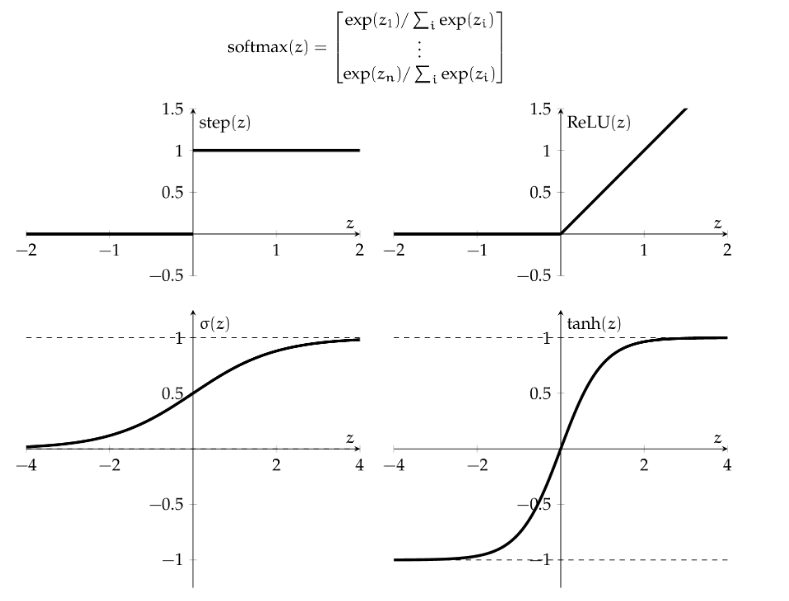
De igual forma, vale la pena tener en cuenta que la activation function de la última capa debería ser diferente para que de cuenta de la forma final que debe tener el output de toda nuestra NN.

Conviene utilizar en la última capa algunas en específico según qué función de pérdida se haya utilizado. Algunos casados que funcionan muy bien son:
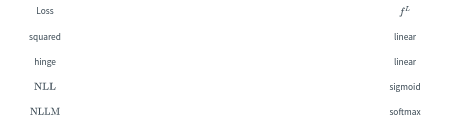

## Training: error back-propagation

Queremos minimizar la función objetivo, y para optimizarla es necesario hacer gradient descent, pero hacerlo como lo hacíamos antes es muy costoso computacionalmente, incluso el estocástico. Para simplificar la computación usamos back-prop (la misma vaina que regla de la cadena). $$$$
Para ejecutar el algo, regordemos cómo depende la función de pérdida $\mathcal{L}$ de los pesos de la última capa $W ^L$ con el otuput $A^L$:
$$\frac{\partial \mathcal{L}}{\partial W^ L} = \underbrace{ \frac{\partial \mathcal{L}}{\partial A^ L}}_{\text {depends on loss function}} \cdot \underbrace{\frac{\partial A^ L}{\partial Z^ L}}_{f^{L'}} \cdot \underbrace{\frac{\partial Z^ L}{\partial W^ L}}_{\text {$A^{L-1}$}} \; \; $$
Y para estar pendientes de la dimensión de cada término: 
$$\underbrace{\frac{\partial \text {loss}}{\partial W^ l}}_{m^ l \times n^ l} = \underbrace{A^{l-1}}_{m^ l \times 1} \;  \underbrace{\left(\frac{\partial \text {loss}}{\partial Z^ l}\right)^ T}_{1 \times n^ l}$$

Es decir, para encontrar el gradiente basta buscar $\frac{\partial\mathcal{L}}{\partial Z^l}$. Entonces el gradiente se reduce a:
$$\frac{\partial \mathcal{L}}{\partial Z^1} = \underbrace{\underbrace{ \frac{\partial \mathcal{L}}{\partial A^ L} \cdot \frac{\partial A^ L}{\partial Z^ L} \cdot \frac{\partial Z^ L}{\partial A^{L-1}} \cdot \frac{\partial A^{L-1}}{\partial Z^{L-1}} \cdot \cdots \cdot \frac{\partial A^2}{\partial Z^2}}_{\partial \text {loss} / \partial Z^2} \cdot \frac{\partial Z^2}{\partial A^1}} _{\partial \text {loss} / \partial A^1} \cdot \frac{\partial A^1}{\partial Z^1} \; \; $$

O reescribiendo:
    $$\frac{\partial \mathcal{L}}{\partial Z^ l} = \frac{\partial A^ l}{\partial Z^ l} \cdot W^{l+1} \cdot \frac{\partial A^{l+1}}{\partial Z^{l+1}} \cdot \ldots W^{L-1} \cdot \frac{\partial A^{L-1}}{\partial Z^{L-1}} \cdot W^{L} \cdot \frac{\partial A^{L}}{\partial Z^{L}} \cdot \frac{\partial \mathcal{L}}{A^ L}\; \; $$
    
 Por eso es quese conoce como back propagation, por que primero se ejecuta la red, y después se ajustan los pesos en dirección contraria como muestra la figura: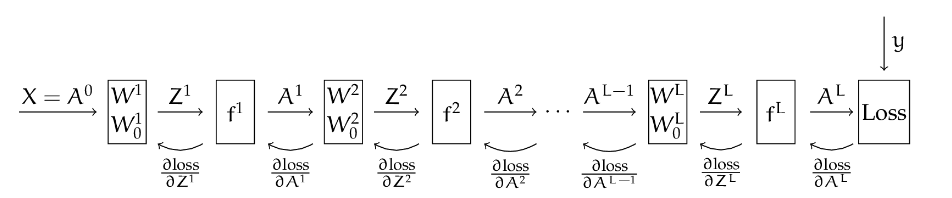
Hay un par de cosas de las que tenemos que preocuparnos: la inicialización de los pesos debido a que la función $\mathcal{L}$ puede no llevarnos a un mínimo global si se eligen mal los valores iniciales. Por esta razón, conviene inicializar algunos valores de peso aleatoriamente a ver qué pasa y mantener los pesos relativamente bajo.

De esta forma, el pseudocódigo que describe el algoritmo de stochastic gradient descent con Back propagation para una red feed-forward es:
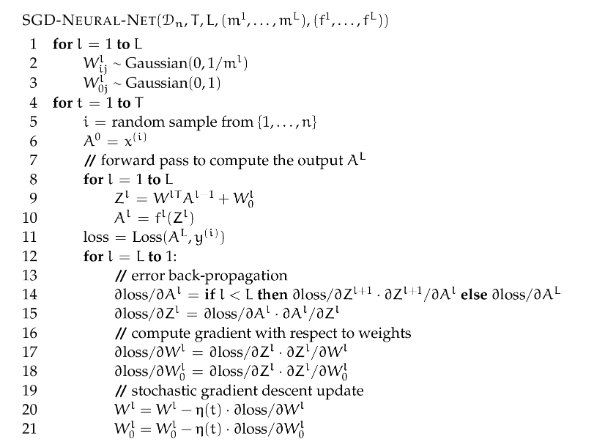

## Optimizing Parameters

Por ahora, todo funciona, no obstante, necesitaríamos un super computador para hacer una red relativamente competente, entonces conviene hacer algunos trucos baratos para mejorar los tiempos.



### Mini-Batches

Una forma de mejorar el GD es en vez de utilizar el estocástico (que toma sólamente un data point aleatorio en cada iteración), vamos a tomar pedasos más pequeños del data-set. El pseudocódigo de este método es:
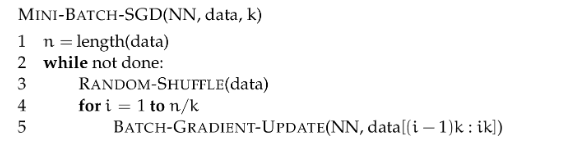

### Adaptive step size

Para evitar problemas con el código al programar nosotros mismos el step size $\eta(t)$, vamos a utilizar lo que se conoce como $\textit{moving averange}$ que permita hacer un ajuste de $\eta$ para cada peso de cada neurona... esto va a permitir asegurar convergencia del gradient descent más fácil. Alguno de los métodos que se usan son:
* Momentum
* Adagrad y Adadelta



### Regularization

Todavía es necesario cuidarnos del overfitting, pero no tanto como se esperaría con otros métdos de Machine Learning. Uno de los métodos más famosos es el de $\textit{Weight Decay}$, que es de la forma:
$$J(W) = \sum _{i = 1}^{n}\text {Loss}(\text {NN}(x^{(i)}), y^{(i)}; W) + \lambda \| W\| ^2$$

Con esto, en el gradient descent, el update para los pesos queda:
$$W_t  = W_{t-1}(1 - \lambda \eta ) - \eta \left(\nabla _{W}\text {Loss}(\text {NN}(x^{(i)}), y^{(i)}; W_{t-1})\right) \; \; .$$

Otro método muy utilizado actualmente se conoce como $\textit{Early Stopping}$. Es uno de los más sencillos de utilizar por que es simplemente en el algoritmo un validation dataset para verificar en qué momento el loss sobre este data set es mínimo, y en ese punto dejar de entrenar la red. 
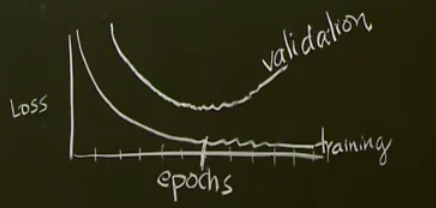
Por último, también es muy útil simplemente meterle ruido al dataset de entrenamiento. Algunos otros un poco más sofisticados son $\textit{Batch Normalization}$ y $\textit{Drop Out}$.

# <center>Toy Neural Netwok</center>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
            
            
class Module:
    def sgd_step(self, lrate): pass  # For modules w/o weights


class Linear(Module):
    def __init__(self, m, n):
        self.m, self.n = (m, n)  # (in size, out size)
        self.W0 = np.zeros([self.n, 1])  # (n x 1)
        self.W = np.random.normal(0, 1.0 * m ** (-.5), [m, n])  # (m x n)

    def forward(self, A):
        self.A = A
        return np.dot(self.W.T, A) + self.W0  # (m x n)^T (m x b) = (n x b)

    def backward(self, dLdZ):  # dLdZ is (n x b), uses stored self.A
        self.dLdW = np.dot(self.A, dLdZ.T)                  # (m x n)
        self.dLdW0 = dLdZ.sum(axis=1).reshape((self.n, 1))  # (n x 1)
        return np.dot(self.W, dLdZ)                         # (m x b)

    def sgd_step(self, lrate):  # Gradient descent step
        self.W -= lrate*self.dLdW
        self.W0 -= lrate*self.dLdW0


class Tanh(Module):            # Layer activation
    def forward(self, Z):
        self.A = np.tanh(Z)
        return self.A

    def backward(self, dLdA):    # Uses stored self.A
        return dLdA * (1.0 - (self.A ** 2))


class ReLU(Module):              # Layer activation
    def forward(self, Z):
        self.A = np.maximum(0, Z)
        return self.A

    def backward(self, dLdA):    # uses stored self.A
        return dLdA * (self.A != 0)


class SoftMax(Module):           # Output activation
    def forward(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=0)

    def backward(self, dLdZ):    # Assume that dLdZ is passed in
        return dLdZ

    def class_fun(self, Ypred):  # Return class indices
        return np.argmax(Ypred, axis=0)


class NLL(Module):       # Loss
    def forward(self, Ypred, Y):
        self.Ypred = Ypred
        self.Y = Y
        return float(np.sum(-Y * np.log(Ypred)))

    def backward(self):  # Use stored self.Ypred, self.Y
        return self.Ypred - self.Y


class Sequential:
    def __init__(self, modules, loss):            # List of modules, loss module
        self.modules = modules
        self.loss = loss

    def sgd(self, X, Y, iters=100, lrate=0.005):  # Train
        D, N = X.shape
        sum_loss = 0
        for it in range(iters):
            i = np.random.randint(N)
            Xt = X[:, i:i+1]
            Yt = Y[:, i:i+1]
            Ypred = self.forward(Xt)
            sum_loss += self.loss.forward(Ypred, Yt)
            err = self.loss.backward()
            self.backward(err)
            self.sgd_step(lrate)
            self.print_accuracy(it,X,Y,sum_loss)

    def forward(self, Xt):                        # Compute Ypred
        for m in self.modules: Xt = m.forward(Xt)
        return Xt

    def backward(self, delta):                    # Update dLdW and dLdW0
        # Note reversed list of modules
        for m in self.modules[::-1]: delta = m.backward(delta)

    def sgd_step(self, lrate):                    # Gradient descent step
        for m in self.modules: m.sgd_step(lrate)

    def print_accuracy(self, it, X, Y, cur_loss, every=250):
        # Utility method to print accuracy on full dataset, should
        # improve over time when doing SGD. Also prints current loss,
        # which should decrease over time. Call this on each iteration
        # of SGD!
        if it % every == 1:
            cf = self.modules[-1].class_fun
            acc = np.mean(cf(self.forward(X)) == cf(Y))
            print('Iteration =', it, '	Acc =', acc, '	Loss =', cur_loss)

Para graficar la red y ejecutarla:

In [24]:
def tidy_plot(xmin, xmax, ymin, ymax, center=False, title=None,
              xlabel=None, ylabel=None):
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin - eps, xmax + eps)
    plt.ylim(ymin - eps, ymax + eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax


def plot_points(x, y, ax=None, clear=False,
                xmin=None, xmax=None, ymin=None, ymax=None,
                style='or-', equal=False):
    padup = lambda v: v + 0.05 * abs(v)
    paddown = lambda v: v - 0.05 * abs(v)
    if ax is None:
        if xmin == None: xmin = paddown(np.min(x))
        if xmax == None: xmax = padup(np.max(x))
        if ymin == None: ymin = paddown(np.min(y))
        if ymax == None: ymax = padup(np.max(y))
        ax = tidy_plot(xmin, xmax, ymin, ymax)
        x_range = xmax - xmin;
        y_range = ymax - ymin
        if equal and .1 < x_range / y_range < 10:
            # ax.set_aspect('equal')
            plt.axis('equal')
            if x_range > y_range:
                ax.set_xlim((xmin, xmax))
            else:
                ax.set_ylim((ymin, ymax))
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ax.plot(x, y, style, markeredgewidth=0.0, linewidth=5.0)
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim);
    ax.set_ylim(ylim)
    ax.grid(True, which='both')
    return ax


def add_ones(X):
    return np.vstack([X, np.ones(X.shape[1])])


def plot_data(data, labels, ax=None,
              xmin=None, xmax=None, ymin=None, ymax=None):
    # Handle 1D data
    if data.shape[0] == 1:
        data = add_ones(data)
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin
        y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    for yi in set([int(_y) for _y in set(labels.flatten().tolist())]):
        color = ['r', 'g', 'b'][yi]
        marker = ['X', 'o', 'v'][yi]
        cl = np.where(labels[1, :] == yi)
        ax.scatter(data[0, cl], data[1, cl], c=color, marker=marker, s=50,
                   edgecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True, which='both')
    return ax
def rv(value_list):
    return np.array([value_list])


def cv(value_list):
    return np.transpose(rv(value_list))

def plot_objective_2d(J, xmin=-5, xmax=5,
                      ymin=-5, ymax=5,
                      cmin=None, cmax=None,
                      res=50, ax=None):
    if ax is None:
        ax = tidy_plot(xmin, xmax, ymin, ymax)
    else:
        if xmin == None:
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
        else:
            ax.set_xlim((xmin, xmax))
            ax.set_ylim((ymin, ymax))

    ima = np.array([[J(cv([x1i, x2i])) \
                     for x1i in np.linspace(xmin, xmax, res)] \
                    for x2i in np.linspace(ymin, ymax, res)])
    im = ax.imshow(np.flipud(ima), interpolation='none',
                   extent=[xmin, xmax, ymin, ymax],
                   cmap='viridis')
    if cmin is not None or cmax is not None:
        if cmin is None: cmin = min(ima)
        if cmax is None: cmax = max(ima)
        im.set_clim(cmin, cmax)
    plt.colorbar(im)
    return ax
def plot_nn(X, Y, nn):
    """ Plot output of nn vs. data """
    def predict(x):
        return nn.modules[-1].class_fun(nn.forward(x))[0]
    xmin, ymin = np.min(X, axis=1)-1
    xmax, ymax = np.max(X, axis=1)+1
    nax = plot_objective_2d(lambda x: predict(x), xmin, xmax, ymin, ymax)

    plot_data(X, Y, nax)
    plt.show()
    
def ejecuta(X,Y,iters,lrate,Funciones=[],loss="NLL"):
    if Funciones==[]: pass
    else:
        nn = Sequential(Funciones, NLL())
        nn.sgd(X, Y, iters, lrate)
        plot_nn(X,Y,nn)

Iteration = 1 	Acc = 0.5 	Loss = 2.618236911698243
Iteration = 251 	Acc = 0.75 	Loss = 168.8770569647584
Iteration = 501 	Acc = 0.75 	Loss = 295.61586145486183
Iteration = 751 	Acc = 0.75 	Loss = 409.5705516951558


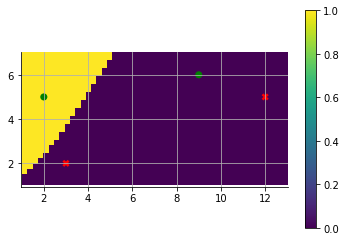

In [25]:
X=np.array([[ 2,  3,  9, 12],
       [ 5,  2,  6,  5]])
Y=np.array([[0, 1, 0, 1],
       [1, 0, 1, 0]])
ejecuta(X,Y,1000,0.05,[Linear(2, 3), Tanh(), Linear(3, 2), SoftMax()])
